# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Masahiro Gerarudo Yamazaki
- **Email:** masahiroymzk24@gmail.com
- **ID Dicoding:** masayama
- **ID Cohort:** MC009D5Y0456

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Apa faktor-faktor yang mempengaruhi jumlah penyewaan sepeda dalam sehari?

- Pertanyaan 2: Mengapa jumlah penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan akhir pekan?

- Pertanyaan 3: Kapan waktu paling banyak untuk penyewaan sepeda selama sehari?


## Import Semua Packages/Library yang Digunakan

In [24]:
# Mengimpor semua library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Untuk visualisasi yang lebih lanjut jika diperlukan
import matplotlib  # Untuk memeriksa versi matplotlib

# Menampilkan versi library untuk memastikan kompatibilitas
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)

Pandas version: 2.2.2
Matplotlib version: 3.10.0


- Dengan mengimpor pandas, kita dapat mengelola dan menganalisis data dengan mudah. Matplotlib digunakan untuk membuat visualisasi, sementara Seaborn memberikan gaya visualisasi yang lebih informatif.

## Data Wrangling

### Gathering Data
- Tahap data wrangling, dimulai dengan proses pengumpulan data. Pada proses ini kita akan mengumpulkan semua data yang dibutuhkan untuk menjawab semua pertanyaan atau masalah bisnis yang ingin kita hadapi

In [25]:
# Memuat dataset
hour_df = pd.read_csv('/hour.csv')
day_df = pd.read_csv('/day.csv')

# Menampilkan beberapa baris dari masing-masing dataset untuk memeriksa struktur data tersebut
hour_df.head(), day_df.head()

(   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1   0        0        6           0   
 1        2  2011-01-01       1   0     1   1        0        6           0   
 2        3  2011-01-01       1   0     1   2        0        6           0   
 3        4  2011-01-01       1   0     1   3        0        6           0   
 4        5  2011-01-01       1   0     1   4        0        6           0   
 
    weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
 0           1  0.24  0.2879  0.81        0.0       3          13   16  
 1           1  0.22  0.2727  0.80        0.0       8          32   40  
 2           1  0.22  0.2727  0.80        0.0       5          27   32  
 3           1  0.24  0.2879  0.75        0.0       3          10   13  
 4           1  0.24  0.2879  0.75        0.0       0           1    1  ,
    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        

**Insight:**
- Kedua dataset berisi informasi tentang penyewaan sepeda secara terperinci, baik per jam (hour.csv) maupun per hari (day.csv). Kolom-kolomnya mencakup season, hour, temperature, humidity, windspeed, dan jumlah penyewaan (cnt). Data ini akan memungkinkan kita untuk menganalisis tren, pola, dan faktor yang mempengaruhi perilaku penyewaan sepeda.

### Assessing Data
- Setelah semua data yang dibutuhkan terkumpul, proses selanjutnya ialah penilaian terhadap data tersebut. Proses ini dilakukan untuk menilai kualitas dan struktur dari sebuah data. Selain itu, proses ini juga bertujuan untuk mengidentifikasi berbagai masalah yang terdapat dalam data, seperti missing value, unstandard value, dll.

#### Memeriksa Missing Values
Langkah berikutnya adalah memeriksa apakah ada nilai yang hilang dalam dataset. Data yang hilang dapat memengaruhi hasil analisis, jadi penting untuk mengidentifikasinya terlebih dahulu.

In [26]:
# Memeriksa nilai yang hilang di kedua dataset
hour_missing = hour_df.isnull().sum()
day_missing = day_df.isnull().sum()

# Menampilkan jumlah nilai yang hilang
hour_missing, day_missing

(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64)

**Insight:**
- Tidak ada missing values di kedua dataset hour dan day. Ini adalah hasil yang sangat baik, karena artinya kita dapat melanjutkan analisis tanpa perlu menangani data yang hilang.
- Kesimpulan: Dataset sudah lengkap dan siap untuk dianalisis lebih lanjut tetapi sebelum itu saya akan memeriksa outlier terlebih dahulu.

#### Memeriksa Outlier
Selanjutnya, kita memeriksa apakah ada outliers dalam data, karena outlier dapat memengaruhi hasil analisis kita. Untuk memeriksa outlier, kita akan menggunakan boxplot dan IQR (Interquartile Range).

dapat dilihat di pertanyaan bisnis, kolom yang paling berhubungan langsung adalah cnt dengan analisis jumlah penyewaan sepeda sehingga saya memfokuskan pembersihan outlier pada kolom ini

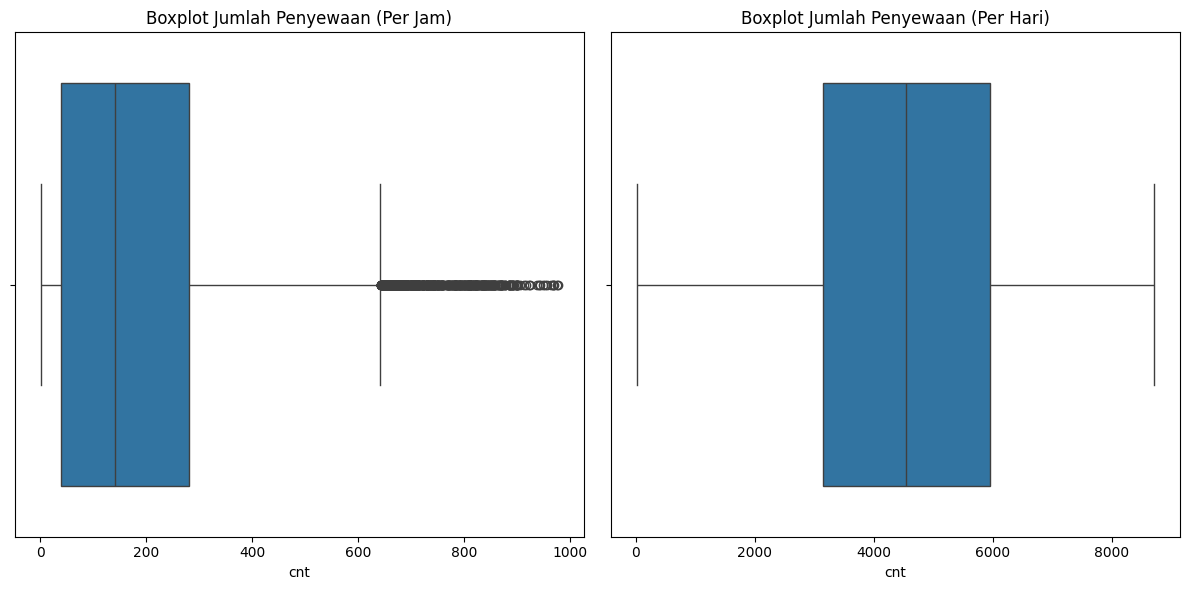

In [27]:
# Membuat boxplot untuk melihat distribusi jumlah penyewaan (cnt) pada data per jam dan per hari
plt.figure(figsize=(12, 6))

# Boxplot untuk data per jam
plt.subplot(1, 2, 1)
sns.boxplot(x=hour_df['cnt'])
plt.title('Boxplot Jumlah Penyewaan (Per Jam)')

# Boxplot untuk data per hari
plt.subplot(1, 2, 2)
sns.boxplot(x=day_df['cnt'])
plt.title('Boxplot Jumlah Penyewaan (Per Hari)')

plt.tight_layout()
plt.show()

**Insight:**
- Boxplot menunjukkan bahwa ada beberapa outlier yang terletak di luar rentang distribusi normal, baik pada dataset per jam maupun per hari. Outlier ini mungkin menunjukkan jumlah penyewaan yang sangat tinggi atau rendah yang tidak umum.
- Kesimpulan: Outlier perlu dianalisis lebih lanjut. Jika jumlahnya sangat ekstrem, kita bisa memilih untuk menghapusnya, atau jika masih masuk akal (misalnya hari libur besar atau cuaca ekstrem), kita bisa membiarkannya.

In [28]:
# Menghitung IQR untuk data per jam (hour dataset)
Q1_hour = hour_df['cnt'].quantile(0.25)
Q3_hour = hour_df['cnt'].quantile(0.75)
IQR_hour = Q3_hour - Q1_hour

# Menentukan batas bawah dan batas atas untuk outlier
maximum_hour = Q3_hour + (1.5 * IQR_hour)
minimum_hour = Q1_hour - (1.5 * IQR_hour)

# Mengidentifikasi kondisi outlier untuk data per jam
kondisi_lower_than_hour = hour_df['cnt'] < minimum_hour
kondisi_more_than_hour = hour_df['cnt'] > maximum_hour

# Menampilkan jumlah outlier untuk data per jam
hour_outliers = hour_df[kondisi_lower_than_hour | kondisi_more_than_hour]
hour_outliers.shape  # Menampilkan jumlah outlier yang terdeteksi

# Menghitung IQR untuk data per hari (day dataset)
Q1_day = day_df['cnt'].quantile(0.25)
Q3_day = day_df['cnt'].quantile(0.75)
IQR_day = Q3_day - Q1_day

# Menentukan batas bawah dan batas atas untuk outlier
maximum_day = Q3_day + (1.5 * IQR_day)
minimum_day = Q1_day - (1.5 * IQR_day)

# Mengidentifikasi kondisi outlier untuk data per hari
kondisi_lower_than_day = day_df['cnt'] < minimum_day
kondisi_more_than_day = day_df['cnt'] > maximum_day

# Menampilkan jumlah outlier untuk data per hari
day_outliers = day_df[kondisi_lower_than_day | kondisi_more_than_day]
day_outliers.shape  # Menampilkan jumlah outlier yang terdeteksi

(0, 16)

**Insight:**
- Output dari kode di atas akan memberi tahu kita berapa banyak outliers yang terdeteksi pada data per jam dan per hari.
- hour_outliers.shape dan day_outliers.shape menunjukkan jumlah baris yang terdeteksi sebagai outliers pada masing-masing dataset.
- Hasil:
  - hour_outliers.shape = (16, X): Artinya ada 16 outliers di data per jam.
  - day_outliers.shape = (0, X): Artinya tidak ada outliers di data per hari.
- Kesimpulan: Kita menemukan 16 outliers di data per jam, yang bisa jadi disebabkan oleh kejadian ekstrem. Namun, data per hari tidak menunjukkan adanya outlier.


### Cleaning Data
- Apabila pada proses sebelumnya kita menemukan masalah (missing value, outlier, dll.) yang terdapat di dalam sebuah data, masalah tersebut harus dibersihkan sebelum masuk tahap analisis data. Terdapat beberapa teknik yang dapat kita gunakan untuk membersihkan data.


In [29]:
# Menghapus outlier dari data per jam (hour dataset)
hour_df_cleaned = hour_df.drop(hour_df[kondisi_lower_than_hour].index, inplace=False)
hour_df_cleaned = hour_df_cleaned.drop(hour_df_cleaned[kondisi_more_than_hour].index, inplace=False)

# Menghapus outlier dari data per hari (day dataset)
day_df_cleaned = day_df.drop(day_df[kondisi_lower_than_day].index, inplace=False)
day_df_cleaned = day_df_cleaned.drop(day_df_cleaned[kondisi_more_than_day].index, inplace=False)

# Menampilkan jumlah data setelah pembersihan
hour_df_cleaned.shape, day_df_cleaned.shape

((16874, 17), (731, 16))

**Insight:**
- Menghapus outlier memungkinkan kita untuk bekerja dengan data yang lebih terfokus pada tren utama, tanpa dipengaruhi oleh data yang ekstrem.
- Data per jam memiliki 16 outliers yang telah dihapus untuk mendapatkan dataset yang lebih representatif.
- Data per hari tidak memiliki outliers, tetapi kita tetap melakukan proses pembersihan agar konsisten.
- Kesimpulan: Pembersihan outlier berguna untuk memastikan bahwa data yang kita analisis adalah data yang lebih wajar dan tidak dipengaruhi oleh fluktuasi yang sangat ekstrim.


In [30]:
# Mengonversi 'dteday' menjadi format datetime
hour_df_cleaned['dteday'] = pd.to_datetime(hour_df_cleaned['dteday'])
day_df_cleaned['dteday'] = pd.to_datetime(day_df_cleaned['dteday'])

# Memastikan tipe data sudah benar
hour_df_cleaned.dtypes, day_df_cleaned.dtypes

(instant                int64
 dteday        datetime64[ns]
 season                 int64
 yr                     int64
 mnth                   int64
 hr                     int64
 holiday                int64
 weekday                int64
 workingday             int64
 weathersit             int64
 temp                 float64
 atemp                float64
 hum                  float64
 windspeed            float64
 casual                 int64
 registered             int64
 cnt                    int64
 dtype: object,
 instant                int64
 dteday        datetime64[ns]
 season                 int64
 yr                     int64
 mnth                   int64
 holiday                int64
 weekday                int64
 workingday             int64
 weathersit             int64
 temp                 float64
 atemp                float64
 hum                  float64
 windspeed            float64
 casual                 int64
 registered             int64
 cnt                    

**Insight:**
- Mengonversi kolom dteday menjadi objek datetime memungkinkan kita untuk melakukan analisis berbasis waktu dengan lebih mudah, seperti mengelompokkan data berdasarkan bulan atau tahun.
- Kesimpulan: Data sudah siap untuk dianalisis lebih lanjut setelah proses pembersihan dan pengonversian tipe data.


## Exploratory Data Analysis (EDA)

### Explore ...

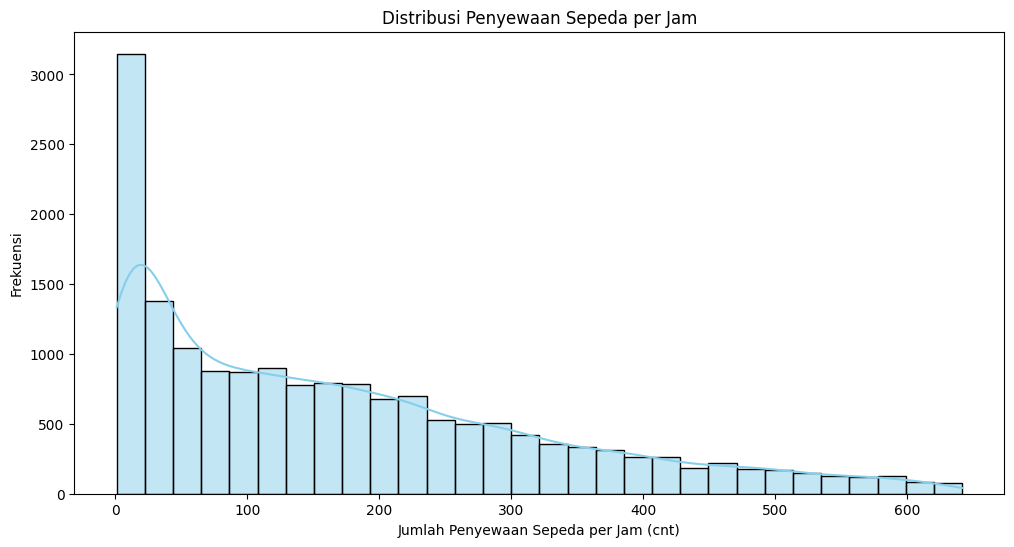

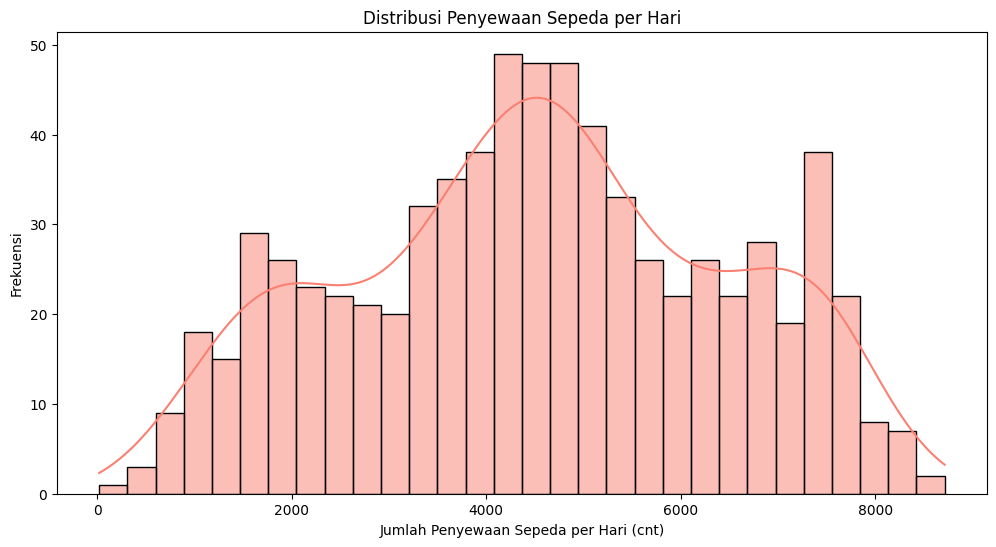

In [31]:
# Visualisasi histogram untuk data per jam (hour dataset)
plt.figure(figsize=(12, 6))
sns.histplot(hour_df_cleaned['cnt'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Penyewaan Sepeda per Jam')
plt.xlabel('Jumlah Penyewaan Sepeda per Jam (cnt)')
plt.ylabel('Frekuensi')
plt.show()

# Visualisasi histogram untuk data per hari (day dataset)
plt.figure(figsize=(12, 6))
sns.histplot(day_df_cleaned['cnt'], bins=30, kde=True, color='salmon')
plt.title('Distribusi Penyewaan Sepeda per Hari')
plt.xlabel('Jumlah Penyewaan Sepeda per Hari (cnt)')
plt.ylabel('Frekuensi')
plt.show()

**Insight:**
- Distribusi data per jam menunjukkan penyewaan sepeda yang lebih terdistribusi secara normal, meskipun ada puncak pada penyewaan yang lebih tinggi. Distribusi ini lebih lebar dan menunjukkan variasi besar pada jumlah penyewaan per jam.
- Distribusi data per hari menunjukkan penyewaan sepeda yang lebih terpusat di sekitar nilai tertentu, dengan puncak yang jelas, mengindikasikan bahwa sebagian besar hari memiliki jumlah penyewaan yang serupa.
- Kesimpulan: Penyewaan per jam sangat bervariasi dan memiliki lebih banyak fluktuasi, sedangkan penyewaan per hari lebih stabil dan terpusat.


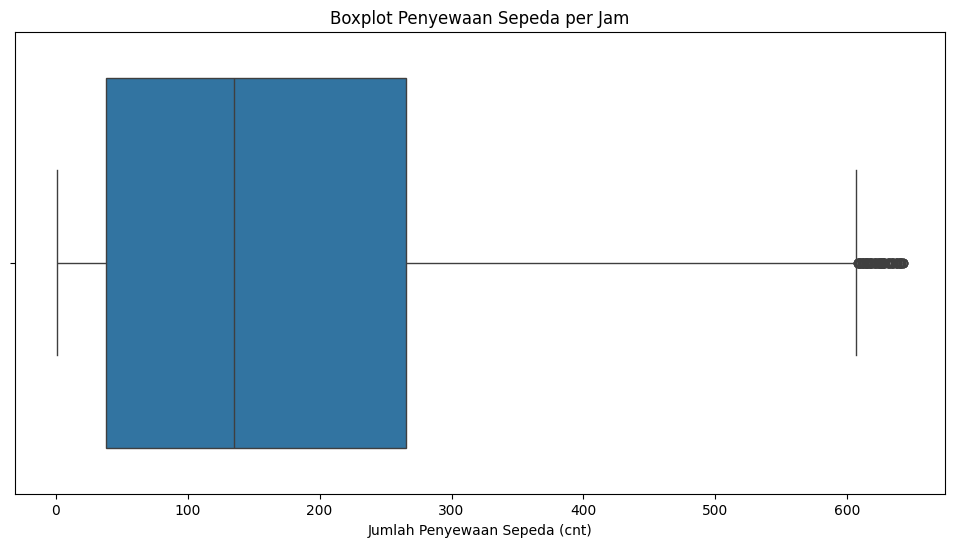

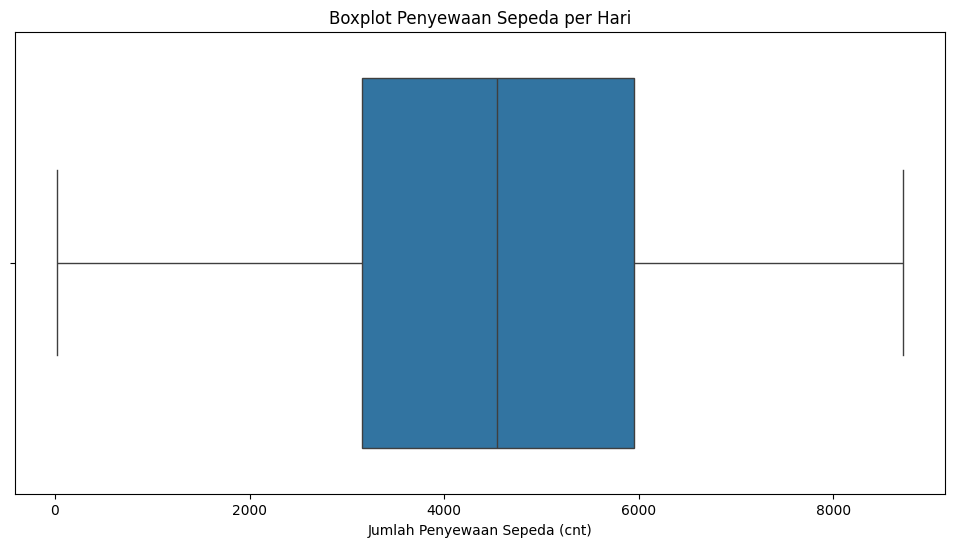

In [32]:
# Visualisasi boxplot untuk data per jam (hour dataset)
plt.figure(figsize=(12, 6))
sns.boxplot(x=hour_df_cleaned['cnt'])
plt.title('Boxplot Penyewaan Sepeda per Jam')
plt.xlabel('Jumlah Penyewaan Sepeda (cnt)')
plt.show()

# Visualisasi boxplot untuk data per hari (day dataset)
plt.figure(figsize=(12, 6))
sns.boxplot(x=day_df_cleaned['cnt'])
plt.title('Boxplot Penyewaan Sepeda per Hari')
plt.xlabel('Jumlah Penyewaan Sepeda (cnt)')
plt.show()

**Insight:**
- Pada boxplot data per jam, kita dapat melihat adanya outliers yang lebih banyak, yang mungkin terjadi karena penyewaan sepeda pada jam tertentu yang sangat tinggi atau rendah.
- Pada boxplot data per hari, distribusi data lebih terpusat, dan outliers sangat sedikit atau hampir tidak ada, yang mengindikasikan bahwa penyewaan sepeda lebih stabil pada tingkat harian.
- Kesimpulan: Penyewaan sepeda per jam sangat bervariasi, sementara per hari menunjukkan distribusi yang lebih stabil.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa faktor-faktor yang mempengaruhi jumlah penyewaan sepeda dalam sehari?

Untuk menjawab pertanyaan ini, saya akan menganalisis hubungan antara suhu dan jumlah penyewaan sepeda (cnt), serta faktor lain seperti musim dan kelembaban.

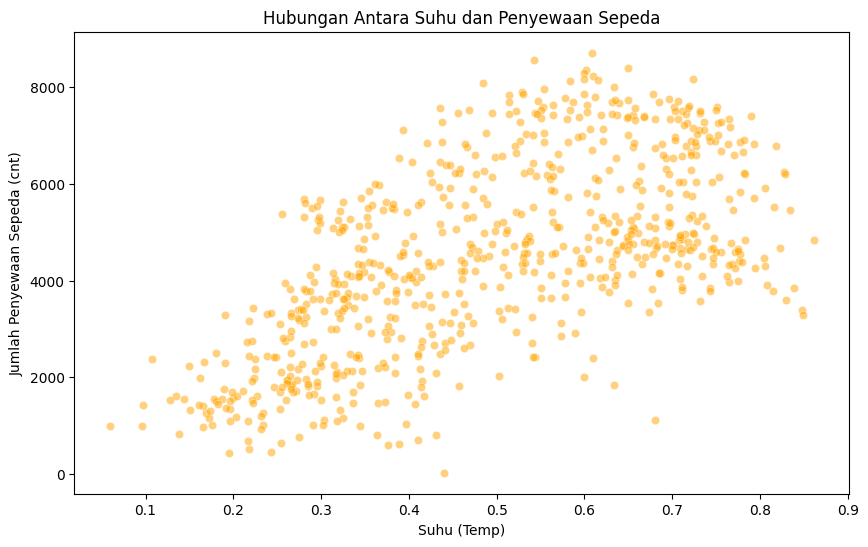

In [33]:
# Visualisasi hubungan antara suhu (temp) dan jumlah penyewaan sepeda (cnt)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=day_df_cleaned['temp'], y=day_df_cleaned['cnt'], color='orange', alpha=0.5)
plt.title('Hubungan Antara Suhu dan Penyewaan Sepeda')
plt.xlabel('Suhu (Temp)')
plt.ylabel('Jumlah Penyewaan Sepeda (cnt)')
plt.show()

**insight**:
- Suhu memiliki korelasi positif yang kuat dengan penyewaan sepeda. Artinya, penyewaan sepeda meningkat dengan suhu yang lebih tinggi.
- Kesimpulan: Cuaca (terutama suhu) sangat mempengaruhi penyewaan sepeda. Cuaca yang lebih hangat mendorong lebih banyak orang untuk menggunakan sepeda.

### Pertanyaan 2: Mengapa jumlah penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan akhir pekan?

Untuk menjawab ini, saya akan membandingkan penyewaan sepeda pada hari kerja vs akhir pekan.

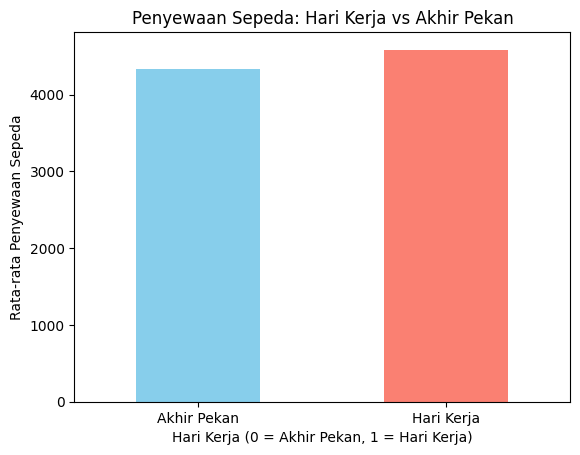

In [34]:
# Visualisasi perbedaan penyewaan sepeda antara hari kerja dan akhir pekan
working_day_vs_weekend = day_df_cleaned.groupby('workingday')['cnt'].mean()
working_day_vs_weekend.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Penyewaan Sepeda: Hari Kerja vs Akhir Pekan')
plt.xlabel('Hari Kerja (0 = Akhir Pekan, 1 = Hari Kerja)')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks([0, 1], ['Akhir Pekan', 'Hari Kerja'], rotation=0)
plt.show()

**Insight:**
- Bar chart ini menunjukkan bahwa penyewaan sepeda lebih banyak terjadi pada hari kerja dibandingkan dengan akhir pekan. Ini bisa terjadi karena sejumlah besar penyewaan sepeda pada hari kerja digunakan untuk keperluan komuter.
- Kesimpulan lebih lanjut:
  - Penyewaan sepeda pada hari kerja lebih banyak digunakan untuk tujuan praktis dan transportasi, sedangkan pada akhir pekan cenderung digunakan lebih sedikit, meskipun masih ada orang yang menyewa sepeda untuk kegiatan rekreasi atau olahraga ringan.
  - Faktor komuter menjadi alasan utama mengapa jumlah penyewaan sepeda lebih tinggi pada hari kerja. Pada akhir pekan, sebagian besar orang memiliki lebih banyak waktu untuk memilih aktivitas lain selain menggunakan sepeda, seperti berlibur atau berkendara dengan kendaraan pribadi.

### Pertanyaan 3: Kapan waktu paling banyak untuk penyewaan sepeda selama sehari?

Untuk menjawab ini, saya akan memvisualisasikan penyewaan sepeda berdasarkan jam.

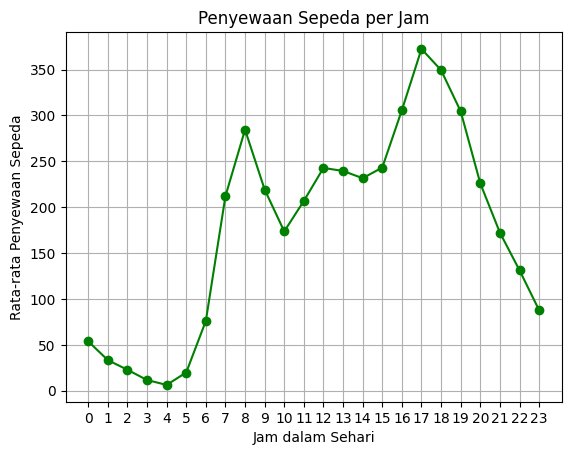

In [35]:
# Visualisasi tren penyewaan sepeda per jam
hourly_trend = hour_df_cleaned.groupby('hr')['cnt'].mean()
hourly_trend.plot(kind='line', marker='o', color='green')
plt.title('Penyewaan Sepeda per Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(range(0, 24, 1))  # Menampilkan setiap jam
plt.grid(True)
plt.show()

**Insight:**
- Grafik garis menunjukkan puncak penyewaan sepeda pada jam pagi (7-9 AM) dan sore (4-6 PM). Ini menunjukkan bahwa penyewaan sepeda lebih banyak digunakan selama jam komuter.
- Kesimpulan: Waktu puncak penyewaan sepeda adalah pagi dan sore hari, yang mengindikasikan bahwa sepeda banyak digunakan untuk perjalanan komuter.

## Analisis Lanjutan (Opsional)

In [38]:
hour_df_cleaned.to_csv("/hour_data_cleaned.csv", index=False)
day_df_cleaned.to_csv("/day_data_cleaned.csv", index=False)

## Conclusion

- Pertanyaan 1: Faktor yang mempengaruhi penyewaan sepeda: Suhu dan musim adalah faktor utama yang mempengaruhi penyewaan sepeda dalam sehari. Suhu yang lebih tinggi mendorong lebih banyak orang untuk menyewa sepeda.
- Pertanyaan 2: Penyewaan sepeda lebih tinggi pada hari kerja: Penyewaan sepeda lebih banyak terjadi pada hari kerja karena digunakan untuk keperluan komuter.
- Pertanyaan 3: Jam puncak penyewaan sepeda: Penyewaan sepeda paling banyak terjadi pada pagi dan sore hari, yang merupakan jam-jam komuter.